<img src = 'tech-daily-PGuCnUzsRSM-unsplash.jpg'>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding , Flatten , Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve , roc_auc_score , confusion_matrix , classification_report , confusion_matrix , consensus_score , precision_score , recall_score, f1_score
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings(action = "ignore")
plt.rcParams["figure.figsize"] = (12,8)

# Importing the dataset

In [2]:
df = pd.read_csv("movie.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Visualizing the ratio of predicted variable

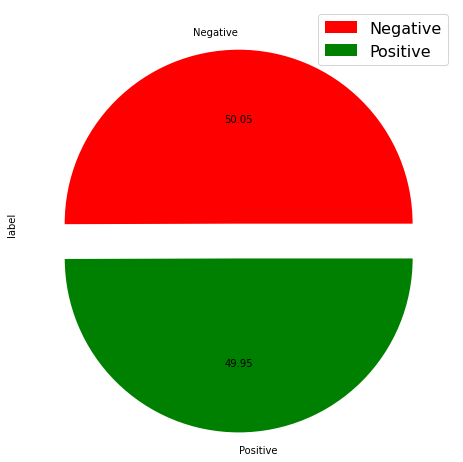

In [3]:
df["label"].value_counts().plot(kind = "pie" , autopct = "%.2f" , explode = [0.0,0.2] , labels = ["Negative" , "Positive"] , colors = ["Red" , "Green"])
plt.legend(loc = "best" , fontsize = 16)
plt.show()

# Splitting data to X and y

In [4]:
X = df["text"]
y = df["label"]

# Splitting data to train and test set

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Automate metrics, cross validation, roc_curve with the help of the functions

In [6]:
def metrics_funct(y_pred) : 
    roc = roc_auc_score(y_test , y_pred)
    gini = (2*roc)-1
    f1 = f1_score(y_test , y_pred)
    prec = precision_score(y_test , y_pred)
    rec = recall_score(y_test , y_pred)
    
    print("The roc auc score is {:.2%}".format(roc))
    print("The gini score is {:.2%}".format(gini))
    print("The f1 score is {:.2%}".format(f1))
    print("The precission score is {:.2%}".format(prec))
    print("The recall score is {:.2%}".format(rec))

In [7]:
def confussion_matrix_func(y_pred_train , y_pred_test) : 
    sns.set(font_scale = 1.5)
    plt.figure(figsize = (30,18))
    cm_train = confusion_matrix(y_train , y_pred_train)
    plt.subplot(2,3,1)
    sns.heatmap(data = cm_train , cmap = plt.cm.Blues , cbar = False , yticklabels=["Negative" , "Positive"] , xticklabels=["Negative" , "Positive"] , annot = True , fmt = ".5g")
    plt.title("The Confussion Matrix for Train Set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,2)
    upper_stack = cm_train[0]/np.sum(cm_train,axis = 1)[0]
    lower_stack = cm_train[1]/np.sum(cm_train,axis = 1)[1]
    final_stack = np.vstack([upper_stack , lower_stack])
    sns.heatmap(data = final_stack , cmap=plt.cm.Blues , cbar=False , yticklabels=["Negative" , "Positive"] , xticklabels=["Negative" , "Positive"] , annot=True , fmt = ".0%")
    plt.title("The Confussion Matrix with Recal Ratio for Train Set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,3)
    left_col = cm_train[:,0]/np.sum(cm_train,axis = 0)[0]
    right_col = cm_train[:,1]/np.sum(cm_train,axis = 0)[1]
    final_stack = np.stack([left_col , right_col])
    sns.heatmap(data = final_stack , cmap=plt.cm.Blues , cbar=False , yticklabels=["Negative" , "Positive"] , xticklabels=["Negative" , "Positive"] , annot=True , fmt = ".0%")
    plt.title("The Confussion Matrix with Precission Ratio for Train Set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    cm_test = confusion_matrix(y_test , y_pred_test)
    plt.subplot(2,3,4)
    sns.heatmap(data = cm_test , cmap = plt.cm.Blues , cbar = False , yticklabels=["Negative" , "Positive"] , xticklabels=["Negative" , "Positive"] , annot = True , fmt = ".5g")
    plt.title("The Confussion Matrix for Test Set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,5)
    upper_stack = cm_test[0]/np.sum(cm_test,axis = 1)[0]
    lower_stack = cm_test[1]/np.sum(cm_test,axis = 1)[1]
    final_stack = np.vstack([upper_stack , lower_stack])
    sns.heatmap(data = final_stack , cmap=plt.cm.Blues , cbar=False , yticklabels=["Negative" , "Positive"] , xticklabels=["Negative" , "Positive"] , annot=True , fmt = ".0%")
    plt.title("The Confussion Matrix with Recal Ratio for Test Set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,6)
    left_col = cm_test[:,0]/np.sum(cm_test,axis = 0)[0]
    right_col = cm_test[:,1]/np.sum(cm_test,axis = 0)[1]
    final_stack = np.stack([left_col , right_col])
    sns.heatmap(data = final_stack , cmap=plt.cm.Blues , cbar=False , yticklabels=["Negative" , "Positive"] , xticklabels=["Negative" , "Positive"] , annot=True , fmt = ".0%")
    plt.title("The Confussion Matrix with Precission Ratio for Test Set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    

In [8]:
def roc_curve_func(y_pred_train_proba , y_pred_test_proba , y_pred_train , y_pred_test) : 
    fpr,tpr,_ = roc_curve(y_true = y_train , y_score = y_pred_train_proba)
    roc_train = roc_auc_score(y_train , y_pred_train)
    plt.plot(fpr,tpr , label = f"Our Model with {np.round(roc_train,2)} Roc Auc Score" , c = "red")
    plt.plot([0,1] , [0,1] , label = "Random Model" ,  c = "green")
    plt.title("The Roc Curve for Train Set" , fontsize = 16)
    plt.ylabel("True Positive Rate" , fontsize = 16)
    plt.xlabel("False Positive Rate" , fontsize = 16)
    plt.legend(loc = "best" , fontsize = 16)
    plt.show()
    roc_test = roc_auc_score(y_test , y_pred_test)
    fpr,tpr,_ = roc_curve(y_true = y_test , y_score = y_pred_test_proba)
    plt.plot(fpr,tpr , label = f"Our Model with {np.round(roc_test,2)} Roc Auc Score" , c = "magenta")
    plt.plot([0,1] , [0,1] , label = "Random Model" ,  c = "green")
    plt.title("The Roc Curve for Test Set" , fontsize = 16)
    plt.ylabel("True Positive Rate" , fontsize = 16)
    plt.xlabel("False Positive Rate" , fontsize = 16)
    plt.legend(loc = "best" , fontsize = 16)
    plt.show()

# Creating MultinomialNB

In [9]:
model_naive = make_pipeline((TfidfVectorizer()) , (MultinomialNB()))
model_naive.fit(X_train , y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

# Score Function for MutlinomialNB

In [10]:
train_score = model_naive.score(X_train , y_train)
test_score = model_naive.score(X_test , y_test)

print("The train score is {:.2%}".format(train_score))
print("The test score is {:.2%}".format(test_score))

The train score is 90.54%
The test score is 86.67%


# Metrics for MultinomialNB

In [11]:
y_pred = model_naive.predict(X_test)
metrics_funct(y_pred = y_pred)

The roc auc score is 86.70%
The gini score is 73.41%
The f1 score is 86.32%
The precission score is 89.49%
The recall score is 83.37%


# Confussion Matrix for MultinomialNB

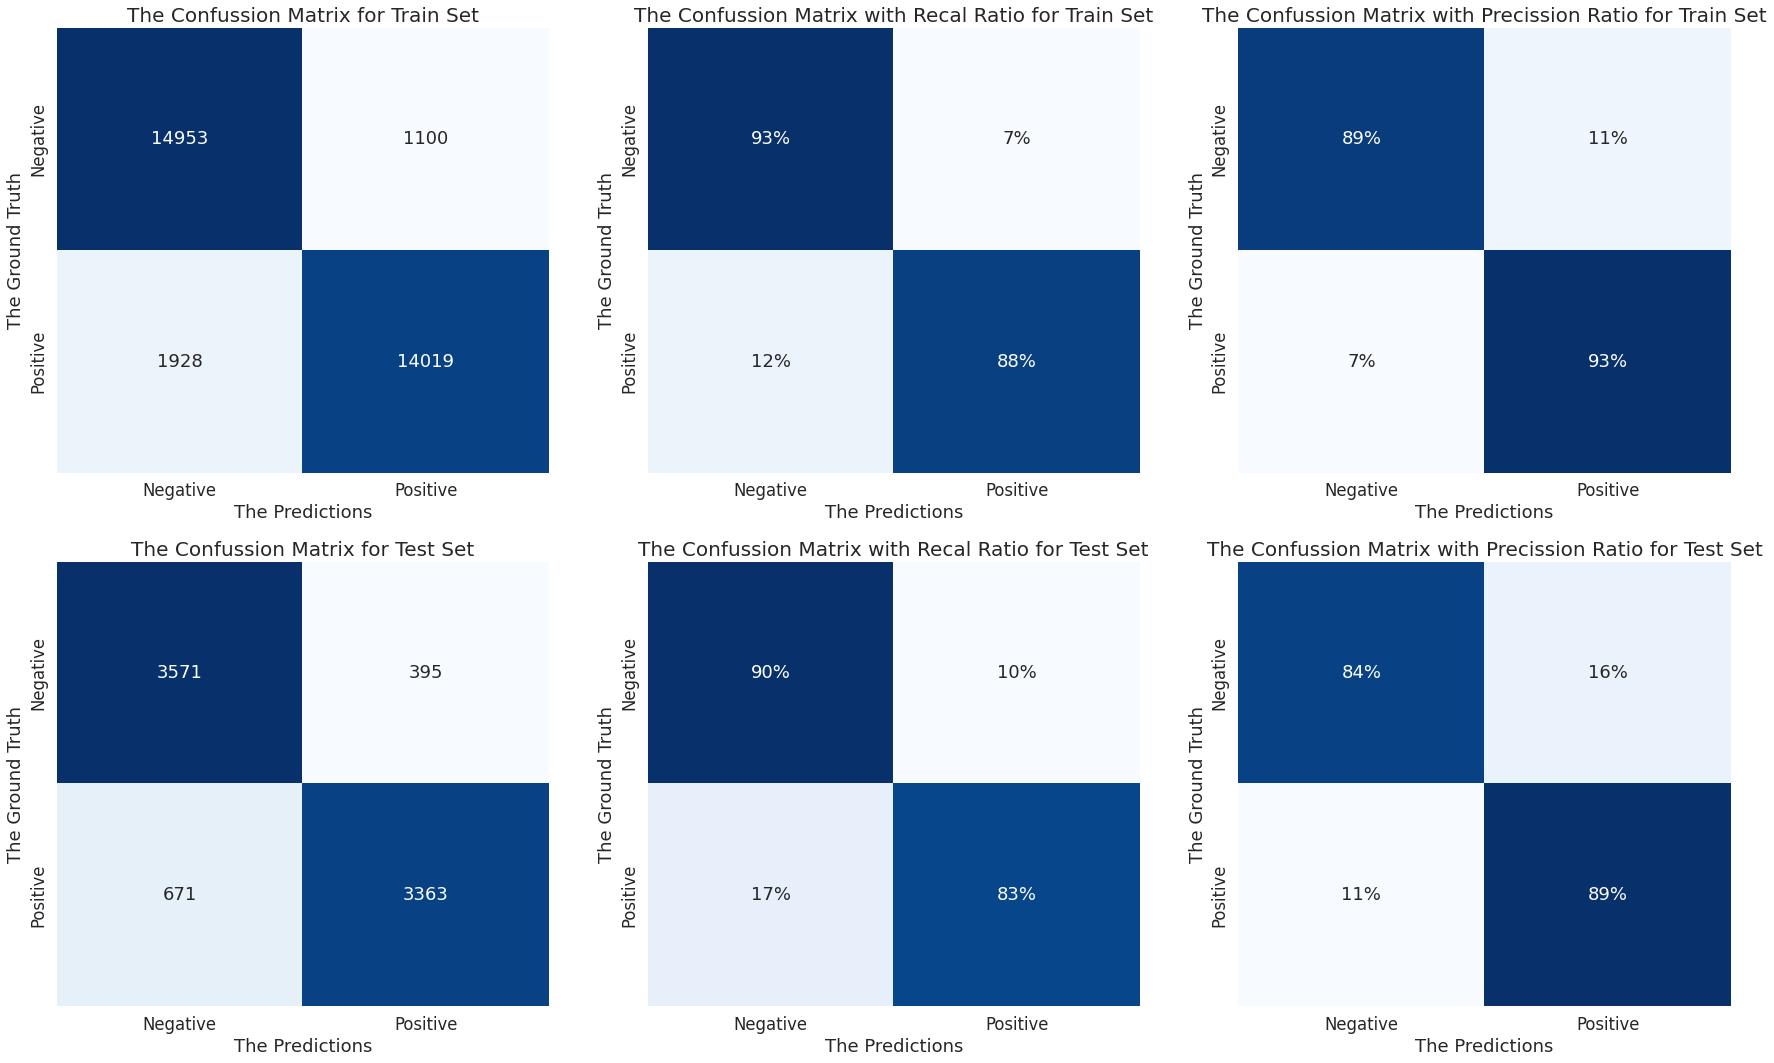

In [12]:
y_pred_train = model_naive.predict(X_train)
y_pred_test = model_naive.predict(X_test)
confussion_matrix_func(y_pred_train=y_pred_train , y_pred_test=y_pred_test)

# Roc Curve for MultinomialNB

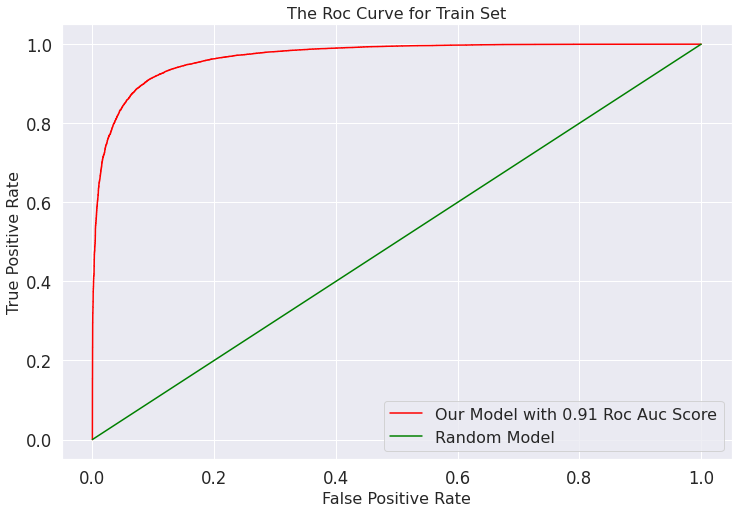

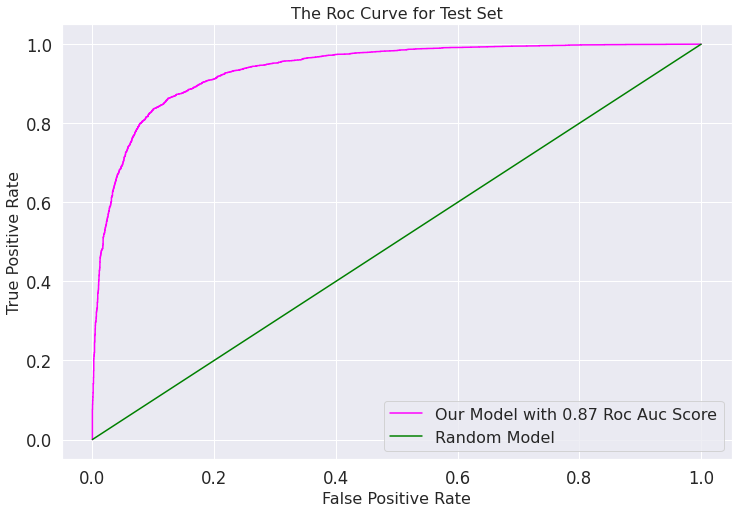

In [13]:
y_pred_train = model_naive.predict(X_train)
y_pred_test = model_naive.predict(X_test)
y_pred_train_proba = model_naive.predict_proba(X_train)[:,1]
y_pred_test_proba = model_naive.predict_proba(X_test)[:,1]
roc_curve_func(y_pred_train_proba , y_pred_test_proba , y_pred_train , y_pred_test)

# Text Classification with Deep Learning

### Creating Vocabulary

In [14]:
def count(text) : 
    count = Counter()
    for x in text : 
        for i in x.split() : 
            count[i] +=1
    return count

In [15]:
Counter = count(text = df["text"])
vocab_size = len(Counter)
avg_sequence_size = round(np.mean([len(x.split()) for x in X_train]))

### Creating Tokenizer for Train Set

In [16]:
token = Tokenizer(num_words=vocab_size , oov_token="OOV")
token.fit_on_texts(X_train)

### Creating Sequences for Train and Test Set

In [17]:
train_sequence = token.texts_to_sequences(X_train)
test_sequence = token.texts_to_sequences(X_test)

### Applying pad_sequence function to make length of senteces equal

In [18]:
padding_train = pad_sequences(sequences=train_sequence , maxlen=avg_sequence_size , padding="post" , truncating="post")
padding_test = pad_sequences(sequences=test_sequence , maxlen=avg_sequence_size , padding = "post" , truncating="post")

### Creating callbacks with the help of the funtion

In [19]:
def callbacks_func(model_path , verbosity = 1 , monitoring = "val_loss") : 
    early = EarlyStopping(monitor=monitoring ,  patience=5 , verbose=verbosity , restore_best_weights=True)
    check = ModelCheckpoint(filepath=model_path , monitor= monitoring , verbose=verbosity , save_best_only=True)
    
    callbacks = [early , check]
    
    return callbacks

# Creating Deep Learning Model

In [20]:
model = Sequential(layers = [
    Embedding(input_dim=vocab_size , output_dim=128 , input_length=avg_sequence_size),
    Flatten(),
    Dense(units= 128 , activation="relu"),
    Dropout(rate = 0.2 , seed = 42),
    Dense(units = 128 , activation="relu"),
    Dropout(rate = 0.2 , seed = 42),
    Dense(units = 128 , activation="relu"),
    Dropout(rate = 0.2 , seed = 42),
    Dense(units = 1 , activation="sigmoid")
] , name = "Text_Classification")

model.compile(optimizer=Adam() , loss=BinaryCrossentropy() , metrics=["accuracy"])

In [21]:
model_training = model.fit(x = padding_train , y = y_train , batch_size=32 , validation_data=(padding_test , y_test) , callbacks=callbacks_func(model_path = f"{model.name}.h5") , verbose = 1 , epochs = 50)

Epoch 1/50
1000/1000 [==============================] - ETA: 0s - loss: 0.3936 - accuracy: 0.8122
Epoch 1: val_loss improved from inf to 0.31753, saving model to Text_Classification.h5
1000/1000 [==============================] - 512s 511ms/step - loss: 0.3936 - accuracy: 0.8122 - val_loss: 0.3175 - val_accuracy: 0.8609
Epoch 2/50
1000/1000 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9805
Epoch 2: val_loss did not improve from 0.31753
1000/1000 [==============================] - 514s 514ms/step - loss: 0.0607 - accuracy: 0.9805 - val_loss: 0.4940 - val_accuracy: 0.8411
Epoch 3/50
1000/1000 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9972
Epoch 3: val_loss did not improve from 0.31753
1000/1000 [==============================] - 498s 498ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.7134 - val_accuracy: 0.8425
Epoch 4/50
1000/1000 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9967
Epoch 4: val_los

### Evaluate the performance of the model

In [22]:
train_score = model.evaluate(padding_train , y_train)
test_score = model.evaluate(padding_test , y_test)

250/250 [==============================] - 2s 8ms/step - loss: 0.3175 - accuracy: 0.8609


### Metrics for Deep Learning Model

In [23]:
y_pred = tf.math.round(tf.squeeze(model.predict(padding_test)))
metrics_funct(y_pred)

The roc auc score is 86.12%
The gini score is 72.23%
The f1 score is 85.71%
The precission score is 88.87%
The recall score is 82.77%


### Confussion Matrix for Deep Learning Model

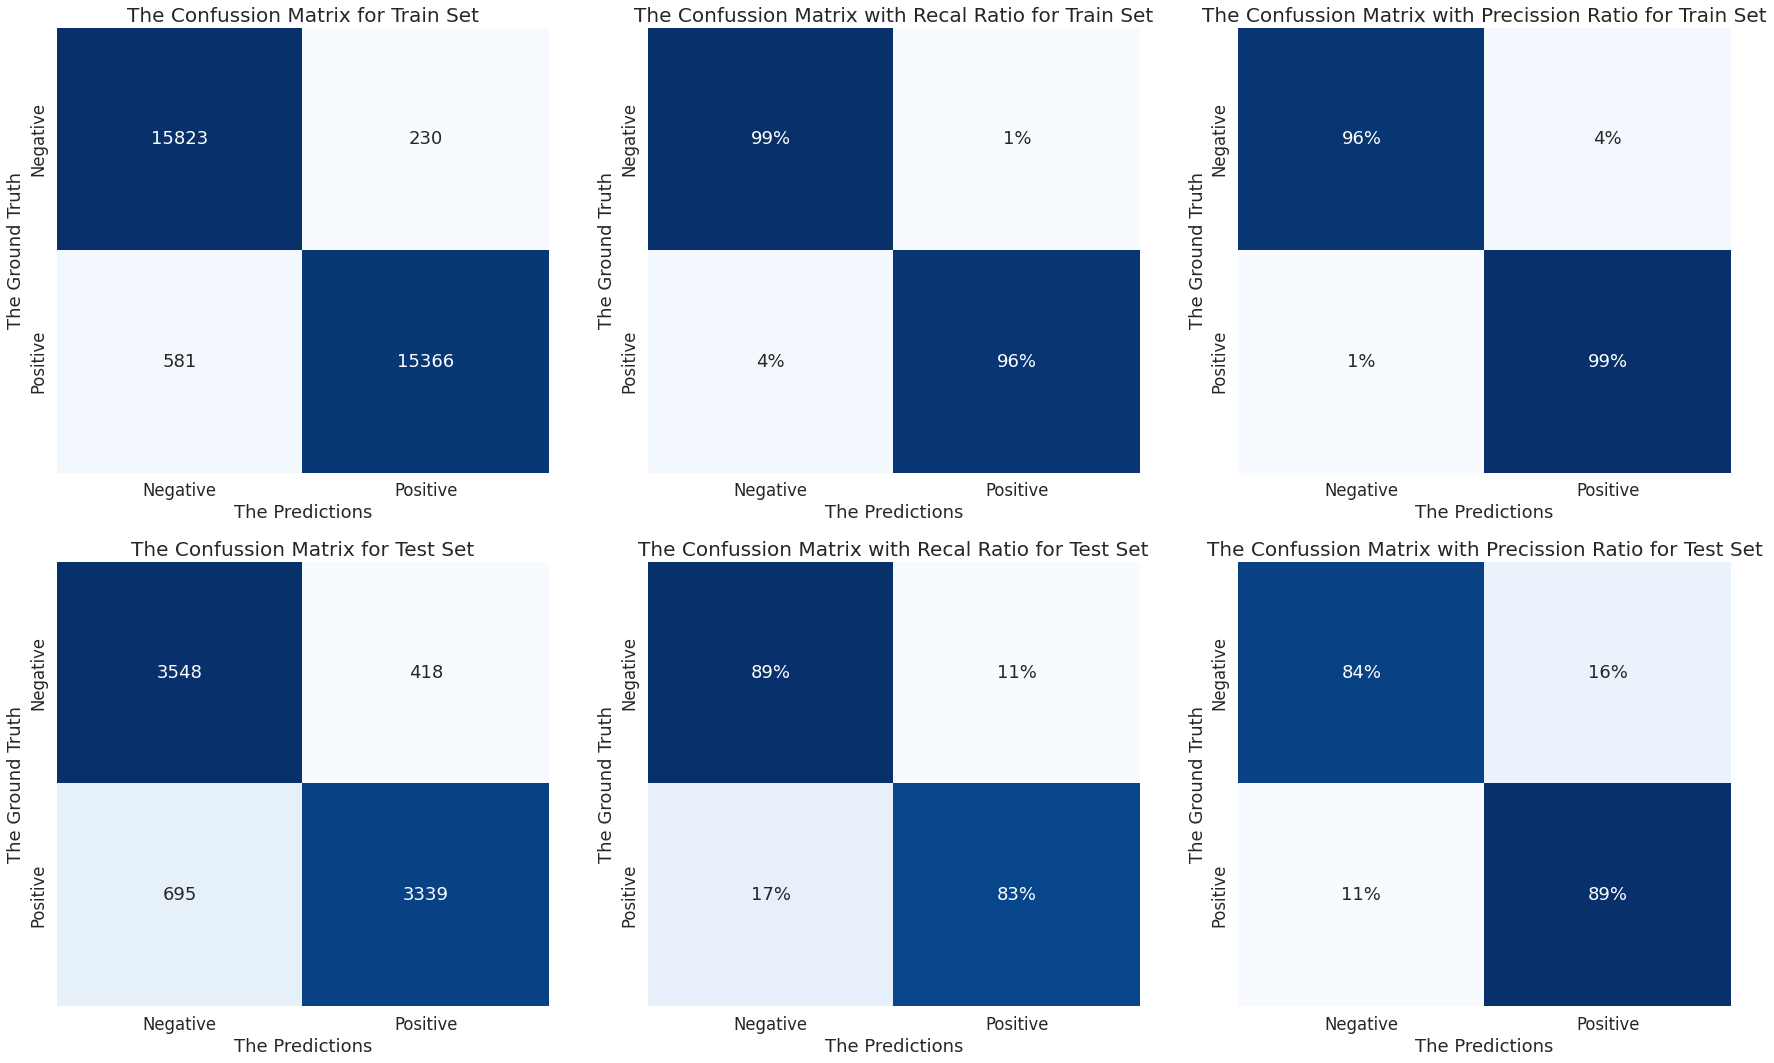

In [24]:
y_pred_train = tf.math.round(tf.squeeze(model.predict(padding_train)))
y_pred_test = tf.math.round(tf.squeeze(model.predict(padding_test)))
confussion_matrix_func(y_pred_train , y_pred_test)

### Roc Curve for Deep Learning Model

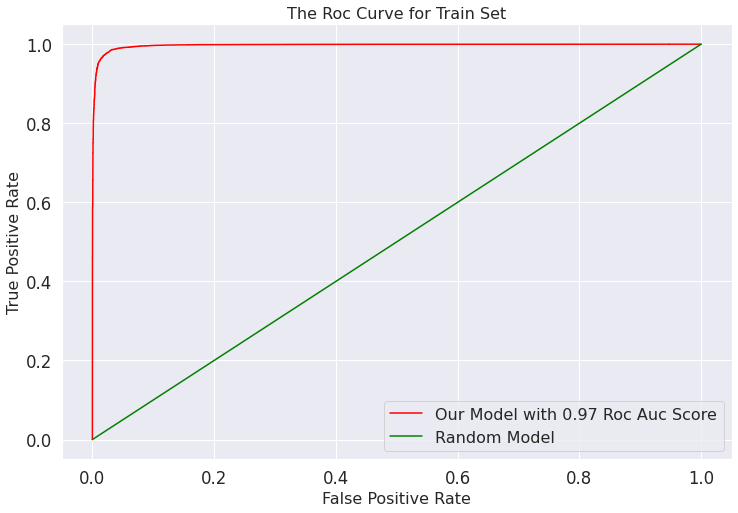

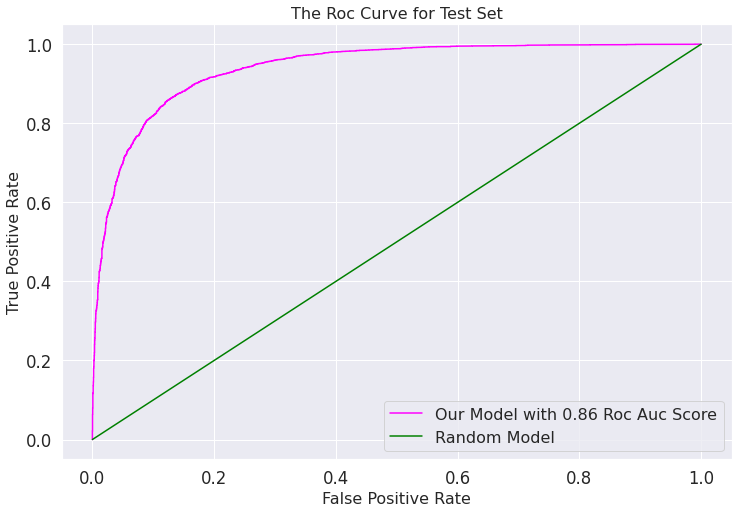

In [25]:
y_pred_train_proba = tf.squeeze(model.predict(padding_train))
y_pred_test_proba = tf.squeeze(model.predict(padding_test))
roc_curve_func(y_pred_train_proba , y_pred_test_proba , y_pred_train , y_pred_test)

### Accuracy and Loss Curves for Deep Learning Model

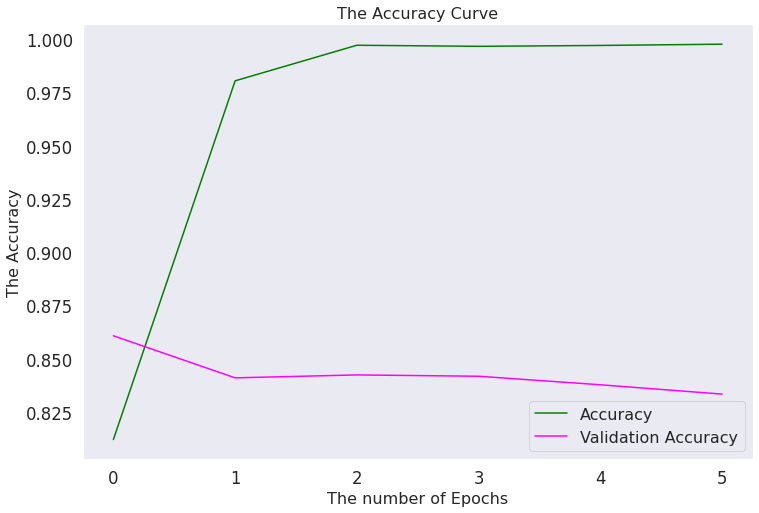

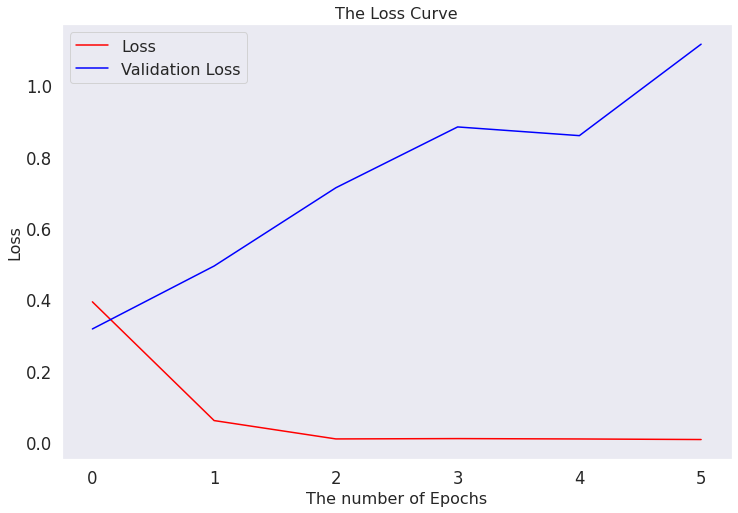

In [26]:
accurracy = model_training.history["accuracy"]
val_accuracy = model_training.history["val_accuracy"]

plt.plot(accurracy , label = "Accuracy" , c = "green")
plt.plot(val_accuracy , label = "Validation Accuracy" , c = "magenta")
plt.title("The Accuracy Curve" , fontsize = 16)
plt.ylabel("The Accuracy" , fontsize = 16)
plt.xlabel("The number of Epochs" , fontsize = 16)
plt.grid()
plt.legend(loc = "best" , fontsize = 16)
plt.show()

print()

loss = model_training.history["loss"]
val_loss = model_training.history["val_loss"]

plt.plot(loss , label = "Loss" , c = "red")
plt.plot(val_loss , label = "Validation Loss" , c = "blue")
plt.title("The Loss Curve" , fontsize = 16)
plt.ylabel("Loss" , fontsize = 16)
plt.xlabel("The number of Epochs" , fontsize = 16)
plt.grid()
plt.legend(loc = "best" , fontsize = 16)
plt.show()

# Adding LSTM and GRU layers to our model

In [27]:
from tensorflow.keras.layers import LSTM , GRU
model_2 = Sequential(layers = [
Embedding(input_dim = vocab_size, output_dim = 128,
input_length = avg_sequence_size),
LSTM(units = 32, return_sequences = True),
GRU(units = 32, return_sequences = True),
GRU(units = 32, return_sequences = True),
LSTM(units = 32),
Dense(units = 128, activation = 'relu'),
Dense(units = 1, activation = 'sigmoid')
], name = 'Sequential_LSTM_GRU')

model_2.compile(optimizer=Adam() , loss=BinaryCrossentropy() , metrics=["accuracy"])

In [28]:
model_training = model_2.fit(x = padding_train , y = y_train , batch_size=32 , validation_data=(padding_test , y_test) , callbacks=callbacks_func(model_path = f"{model_2.name}.h5") , verbose = 1 , epochs = 50)

Epoch 1/50
1000/1000 [==============================] - ETA: 0s - loss: 0.6742 - accuracy: 0.5612
Epoch 1: val_loss improved from inf to 0.69454, saving model to Sequential_LSTM_GRU.h5
1000/1000 [==============================] - 750s 744ms/step - loss: 0.6742 - accuracy: 0.5612 - val_loss: 0.6945 - val_accuracy: 0.4990
Epoch 2/50
1000/1000 [==============================] - ETA: 0s - loss: 0.6811 - accuracy: 0.5303
Epoch 2: val_loss improved from 0.69454 to 0.53189, saving model to Sequential_LSTM_GRU.h5
1000/1000 [==============================] - 747s 747ms/step - loss: 0.6811 - accuracy: 0.5303 - val_loss: 0.5319 - val_accuracy: 0.7494
Epoch 3/50
1000/1000 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8632
Epoch 3: val_loss improved from 0.53189 to 0.26206, saving model to Sequential_LSTM_GRU.h5
1000/1000 [==============================] - 850s 850ms/step - loss: 0.3211 - accuracy: 0.8632 - val_loss: 0.2621 - val_accuracy: 0.8916
Epoch 4/50
1000/1000 [====

### Evaluate the performance of the model

In [29]:
train_score = model_2.evaluate(padding_train , y_train)
test_score = model_2.evaluate(padding_test , y_test)

250/250 [==============================] - 19s 77ms/step - loss: 0.2621 - accuracy: 0.8916


### Metrics for Deep Learning Model

In [ ]:
y_pred = tf.math.round(tf.squeeze(model_2.predict(padding_test)))
metrics_funct(y_pred)

### Confussion Matrix for Deep Learning Model

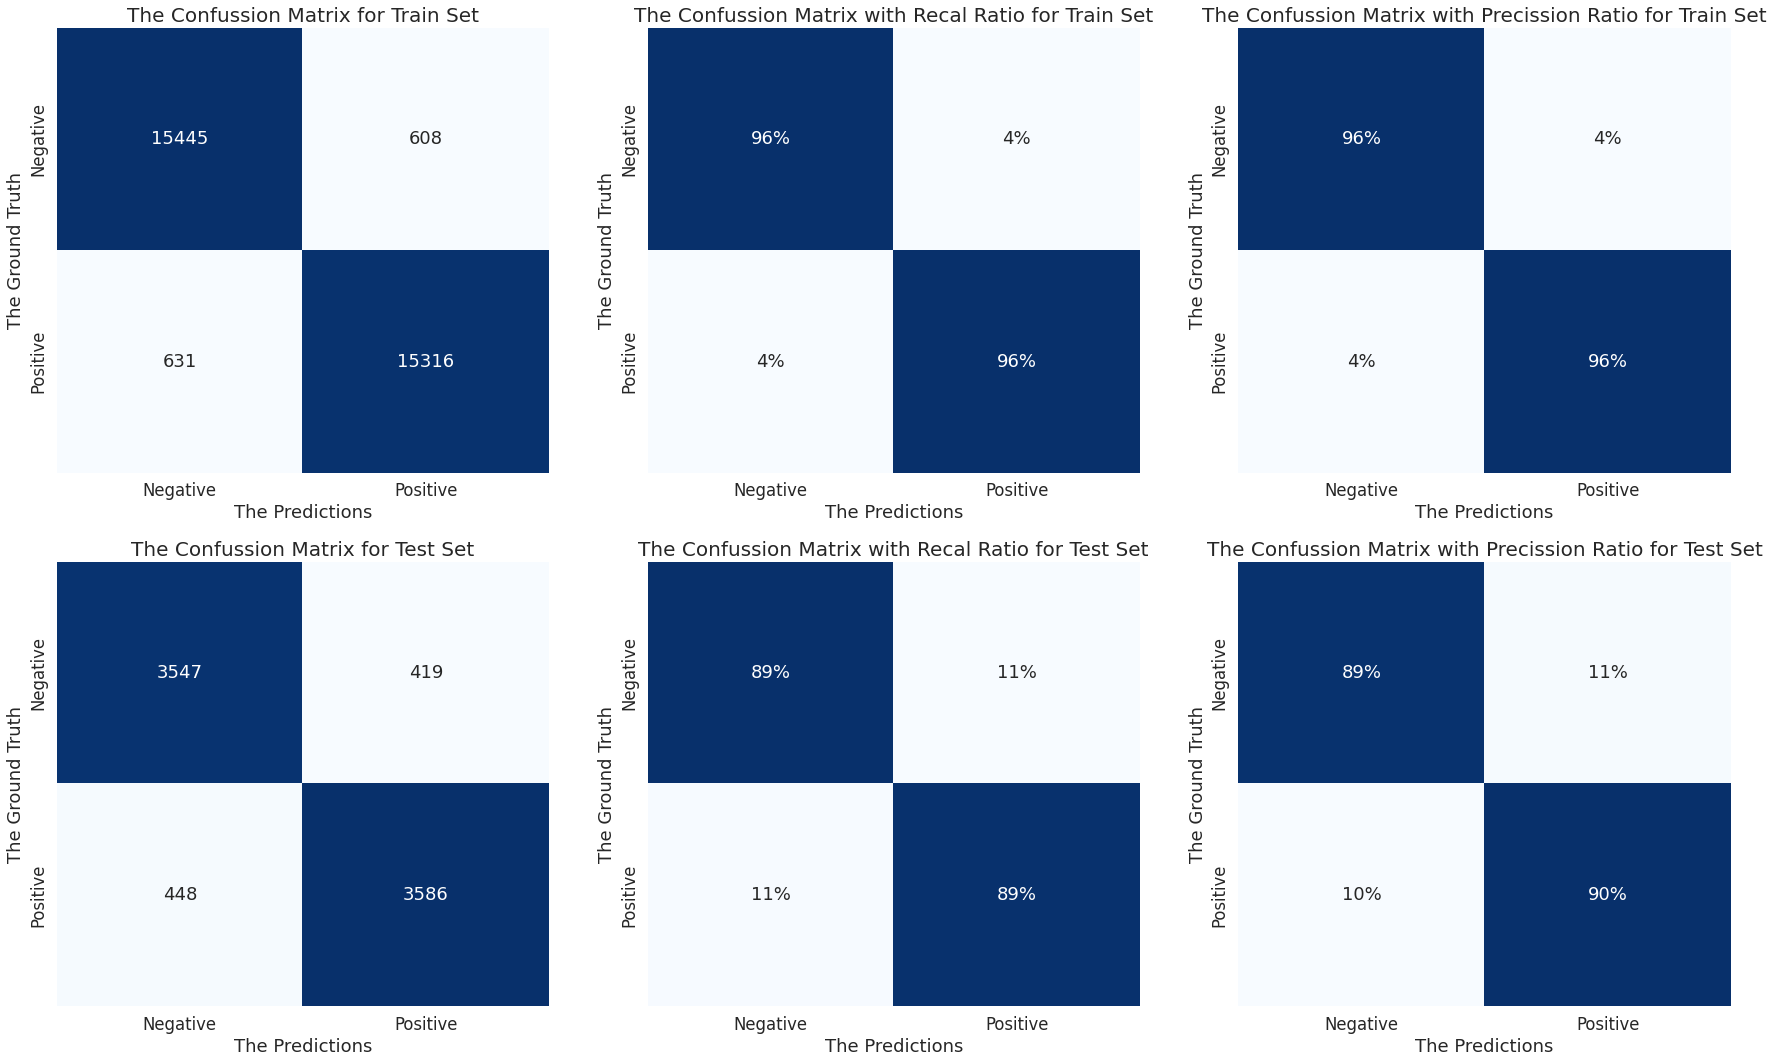

In [31]:
y_pred_train = tf.math.round(tf.squeeze(model_2.predict(padding_train)))
y_pred_test = tf.math.round(tf.squeeze(model_2.predict(padding_test)))
confussion_matrix_func(y_pred_train , y_pred_test)

### Roc Curve for Deep Learning Model

In [ ]:
y_pred_train_proba = tf.squeeze(model_2.predict(padding_train))
y_pred_test_proba = tf.squeeze(model_2.predict(padding_test))
roc_curve_func(y_pred_train_proba , y_pred_test_proba , y_pred_train , y_pred_test)

### Accuracy and Loss Curves for Deep Learning Model

In [ ]:
accurracy = model_training.history["accuracy"]
val_accuracy = model_training.history["val_accuracy"]

plt.plot(accurracy , label = "Accuracy" , c = "green")
plt.plot(val_accuracy , label = "Validation Accuracy" , c = "magenta")
plt.title("The Accuracy Curve" , fontsize = 16)
plt.ylabel("The Accuracy" , fontsize = 16)
plt.xlabel("The number of Epochs" , fontsize = 16)
plt.grid()
plt.legend(loc = "best" , fontsize = 16)
plt.show()

print()

loss = model_training.history["loss"]
val_loss = model_training.history["val_loss"]

plt.plot(loss , label = "Loss" , c = "red")
plt.plot(val_loss , label = "Validation Loss" , c = "blue")
plt.title("The Loss Curve" , fontsize = 16)
plt.ylabel("Loss" , fontsize = 16)
plt.xlabel("The number of Epochs" , fontsize = 16)
plt.grid()
plt.legend(loc = "best" , fontsize = 16)
plt.show()

# Prediction of random negative review

In [34]:
list_1 = ['I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.']
tf.math.round(tf.squeeze(model_2.predict(pad_sequences(sequences=token.texts_to_sequences(list_1) , maxlen=avg_sequence_size,
                                                      padding="post" , truncating="post"))))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

# Prediction of random positive rewiev

In [35]:
list_2 = ["When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, but the animation in particular is a sad sight. The storyline is also pretty weak, as its more like three episodes of Schooby-Doo than the single adventurous story we got the last time. But dont misunderstand, it's not very good Schooby-Doo episodes. I didnt laugh a single time, although I might have sniggered once or twice.<br /><br />To the audience who haven't seen the first movie, or don't especially care for a similar sequel, here is a fast review of this movie as a stand-alone product: If you liked schooby-doo, you might like this movie. If you didn't, you could still enjoy this movie if you have nothing else to do. And I suspect it might be a good kids movie, but I wouldn't know. It might have been better if Milo's Return had been a three-episode series on a cartoon channel, or on breakfast TV."]
tf.math.round(tf.squeeze(model_2.predict(pad_sequences(sequences=token.texts_to_sequences(list_2) , maxlen=avg_sequence_size,
                                                      padding="post" , truncating="post"))))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>